In [1]:
import pandas as pd
from datetime import datetime
from prophet import Prophet
import httpx
from json.decoder import JSONDecodeError
from urllib.parse import quote

In [2]:
# Make an HTTP call to fetch JSON data with automatic decompression
url = "http://143.47.226.125:8080/allStars?repo=helm/helm"
try:
    with httpx.Client(verify=False) as client:
        response = client.get(url, headers={"Accept-Encoding": "gzip, deflate"})
        response.raise_for_status()  # Raise an HTTPError for bad responses
        json_data = response.json()
except JSONDecodeError as e:
    print(f"Error decoding JSON: {e}")
    print("Response content:")
    print(response.text)
    raise  # Reraise the exception to stop execution


In [3]:
# Extracting stars data from the JSON
stars_data = json_data["stars"]

# Creating a DataFrame
df = pd.DataFrame(stars_data, columns=["ds", "y", "y2"])

# Converting the 'ds' column to datetime format
df["ds"] = pd.to_datetime(df["ds"], format="%d-%m-%Y")

# Renaming columns for Prophet compatibility
df = df.rename(columns={"ds": "ds", "y": "y"})

df.head()

,ds,y,y2
0,2015-10-06,0,0
1,2015-10-07,0,0
2,2015-10-08,0,0
3,2015-10-09,0,0
4,2015-10-10,0,0


In [4]:
m = Prophet()
m.fit(df)

22:48:09 - cmdstanpy - INFO - Chain [1] start processing
22:48:09 - cmdstanpy - INFO - Chain [1] done processing


In [5]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3440,2025-03-07
3441,2025-03-08
3442,2025-03-09
3443,2025-03-10
3444,2025-03-11


In [6]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3440,2025-03-07,5.970252,-0.049153,11.443877
3441,2025-03-08,2.287185,-3.153125,8.359073
3442,2025-03-09,1.955149,-3.900804,7.839155
3443,2025-03-10,5.531986,-0.351182,11.682081
3444,2025-03-11,6.779178,1.377681,12.785397


/Users/efumagal/.pyenv/versions/3.12.1/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/efumagal/.pyenv/versions/3.12.1/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


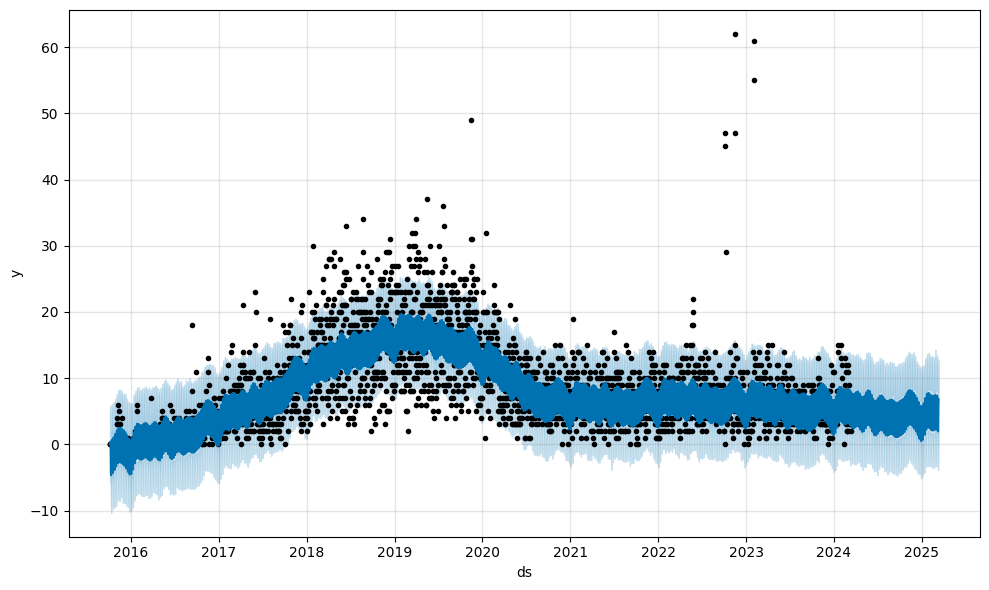

In [7]:
fig1 = m.plot(forecast)

/Users/efumagal/.pyenv/versions/3.12.1/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/efumagal/.pyenv/versions/3.12.1/lib/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/efumagal/.pyenv/versions/3.12.1/lib/python3.12/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python d

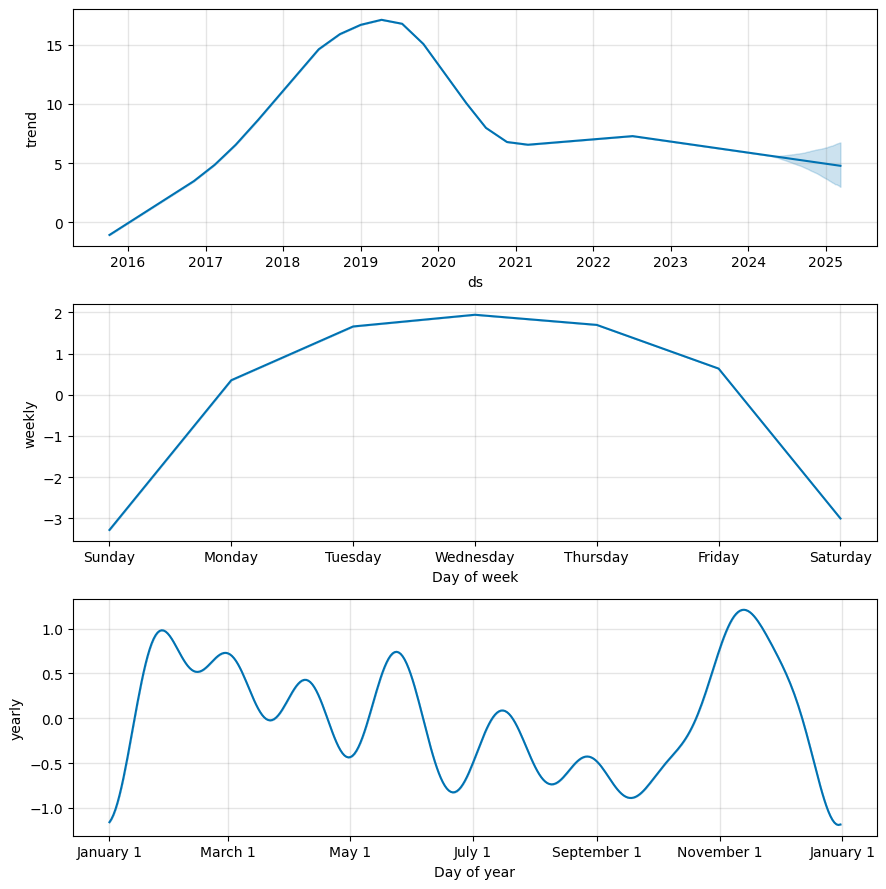

In [8]:
fig2 = m.plot_components(forecast)

In [9]:
from prophet.plot import plot_plotly, plot_components_plotly
from plotly import graph_objects as go

plot_plotly(m, forecast)

In [10]:
plot_components_plotly(m, forecast)